# <center> 해석 가능한 머신러닝 with LIME, SHAP</center>

# <center>2018. 8. 23   장진규</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#정확도-vs-해석-가능성" data-toc-modified-id="정확도-vs-해석-가능성-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>정확도 vs 해석 가능성</a></span></li><li><span><a href="#주제-선정-이유----늑대,-허스키-분류-예시" data-toc-modified-id="주제-선정-이유----늑대,-허스키-분류-예시-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>주제 선정 이유  - 늑대, 허스키 분류 예시</a></span></li><li><span><a href="#기본적인-아이디어-소개영상-(LIME)" data-toc-modified-id="기본적인-아이디어-소개영상-(LIME)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>기본적인 아이디어 소개영상 (LIME)</a></span><ul class="toc-item"><li><span><a href="#단순한-결정-경계" data-toc-modified-id="단순한-결정-경계-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>단순한 결정 경계</a></span></li><li><span><a href="#복잡한-결정-경계" data-toc-modified-id="복잡한-결정-경계-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>복잡한 결정 경계</a></span></li><li><span><a href="#아이디어-소개" data-toc-modified-id="아이디어-소개-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>아이디어 소개</a></span></li></ul></li></ul></li><li><span><a href="#예제-데이터-설명" data-toc-modified-id="예제-데이터-설명-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>예제 데이터 설명</a></span><ul class="toc-item"><li><span><a href="#분류-문제---Steel-Plates-Faults-Data-set" data-toc-modified-id="분류-문제---Steel-Plates-Faults-Data-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>분류 문제 - Steel Plates Faults Data set</a></span></li><li><span><a href="#회귀-문제---Oil-Share-price-prediction" data-toc-modified-id="회귀-문제---Oil-Share-price-prediction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>회귀 문제 - Oil Share price prediction</a></span></li><li><span><a href="#텍스트-분류---GIH-일일정보-데이터" data-toc-modified-id="텍스트-분류---GIH-일일정보-데이터-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>텍스트 분류 - GIH 일일정보 데이터</a></span></li></ul></li><li><span><a href="#LIME" data-toc-modified-id="LIME-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LIME</a></span><ul class="toc-item"><li><span><a href="#분류---Steel-Plates-결함-데이터" data-toc-modified-id="분류---Steel-Plates-결함-데이터-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>분류 - Steel Plates 결함 데이터</a></span><ul class="toc-item"><li><span><a href="#학습-/-테스트-데이터-분리" data-toc-modified-id="학습-/-테스트-데이터-분리-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>학습 / 테스트 데이터 분리</a></span></li><li><span><a href="#모델-학습---SVM" data-toc-modified-id="모델-학습---SVM-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>모델 학습 - SVM</a></span></li><li><span><a href="#예측-결과" data-toc-modified-id="예측-결과-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>예측 결과</a></span></li><li><span><a href="#LIME-시각화-결과-(각-instance-별)" data-toc-modified-id="LIME-시각화-결과-(각-instance-별)-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>LIME 시각화 결과 (각 instance 별)</a></span></li></ul></li><li><span><a href="#회귀---석유-가격-예측" data-toc-modified-id="회귀---석유-가격-예측-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>회귀 - 석유 가격 예측</a></span><ul class="toc-item"><li><span><a href="#학습-/-테스트-데이터-분리" data-toc-modified-id="학습-/-테스트-데이터-분리-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>학습 / 테스트 데이터 분리</a></span></li><li><span><a href="#모델-학습---SVM" data-toc-modified-id="모델-학습---SVM-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>모델 학습 - SVM</a></span></li><li><span><a href="#예측-결과" data-toc-modified-id="예측-결과-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>예측 결과</a></span></li><li><span><a href="#LIME-시각화-결과" data-toc-modified-id="LIME-시각화-결과-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>LIME 시각화 결과</a></span></li></ul></li><li><span><a href="#텍스트-사례---GIH-일일정보-카테고리-분류" data-toc-modified-id="텍스트-사례---GIH-일일정보-카테고리-분류-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>텍스트 사례 - GIH 일일정보 카테고리 분류</a></span><ul class="toc-item"><li><span><a href="#학습-/-테스트-데이터-분리" data-toc-modified-id="학습-/-테스트-데이터-분리-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>학습 / 테스트 데이터 분리</a></span></li><li><span><a href="#모델-학습---RF" data-toc-modified-id="모델-학습---RF-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>모델 학습 - RF</a></span></li><li><span><a href="#예측-결과" data-toc-modified-id="예측-결과-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>예측 결과</a></span></li><li><span><a href="#LIME-시각화-결과" data-toc-modified-id="LIME-시각화-결과-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>LIME 시각화 결과</a></span></li></ul></li></ul></li><li><span><a href="#SHAP" data-toc-modified-id="SHAP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SHAP</a></span><ul class="toc-item"><li><span><a href="#분류-(binary)---RF" data-toc-modified-id="분류-(binary)---RF-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>분류 (binary) - RF</a></span><ul class="toc-item"><li><span><a href="#SHAP-시각화-결과" data-toc-modified-id="SHAP-시각화-결과-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>SHAP 시각화 결과</a></span></li></ul></li><li><span><a href="#회귀---GBT" data-toc-modified-id="회귀---GBT-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>회귀 - GBT</a></span><ul class="toc-item"><li><span><a href="#SHAP-시각화-결과" data-toc-modified-id="SHAP-시각화-결과-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>SHAP 시각화 결과</a></span></li></ul></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#LIME" data-toc-modified-id="LIME-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LIME</a></span></li><li><span><a href="#SHAP-(SHapley-Additive-exPlanations)" data-toc-modified-id="SHAP-(SHapley-Additive-exPlanations)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SHAP (SHapley Additive exPlanations)</a></span></li></ul></li></ul></div>

## Intro

In [1]:
import os
os.chdir('C:/Users/POSRI/my_pic')
from IPython.display import Image

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/POSRI/my_pic'

### 정확도 vs 해석 가능성

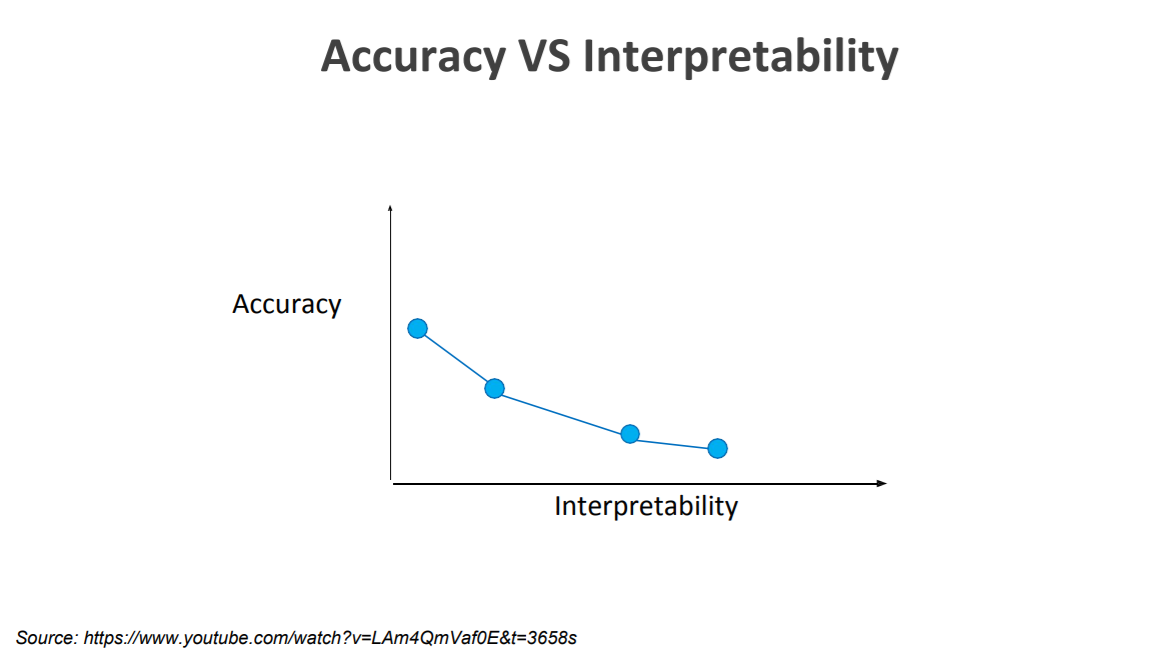

In [85]:
Image('inter.png',width=1000, height=1000)

# 높은 정확도, 높은 해석 가능성

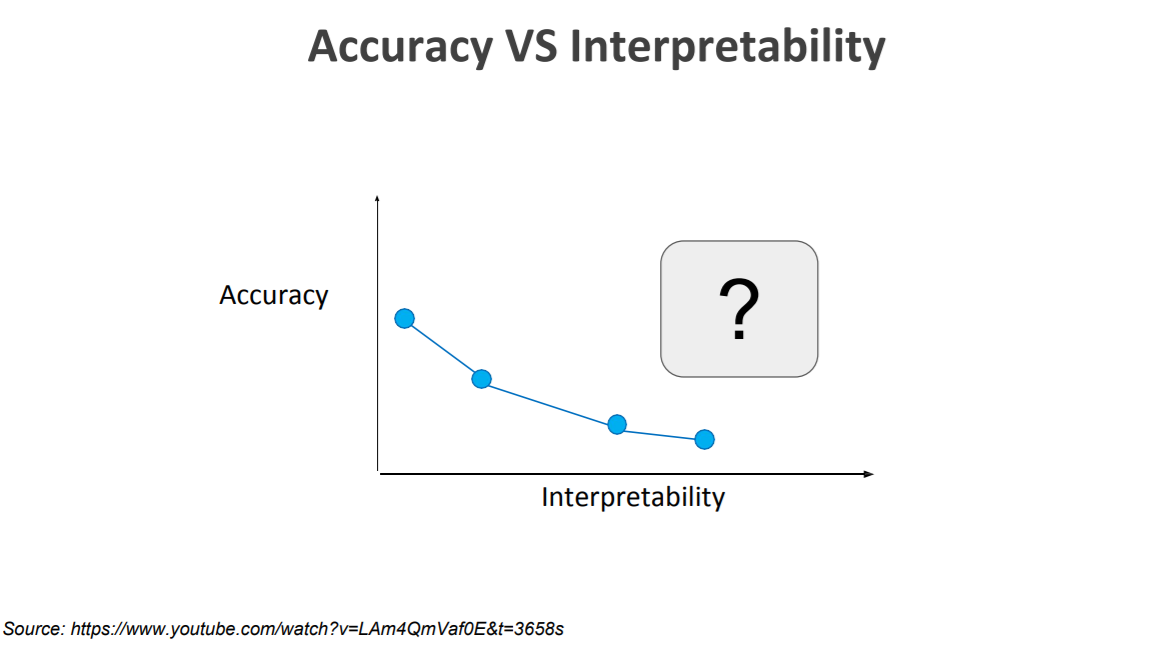

In [86]:
Image('inter2.png',width=1000, height=1000)

### 주제 선정 이유  - 늑대, 허스키 분류 예시

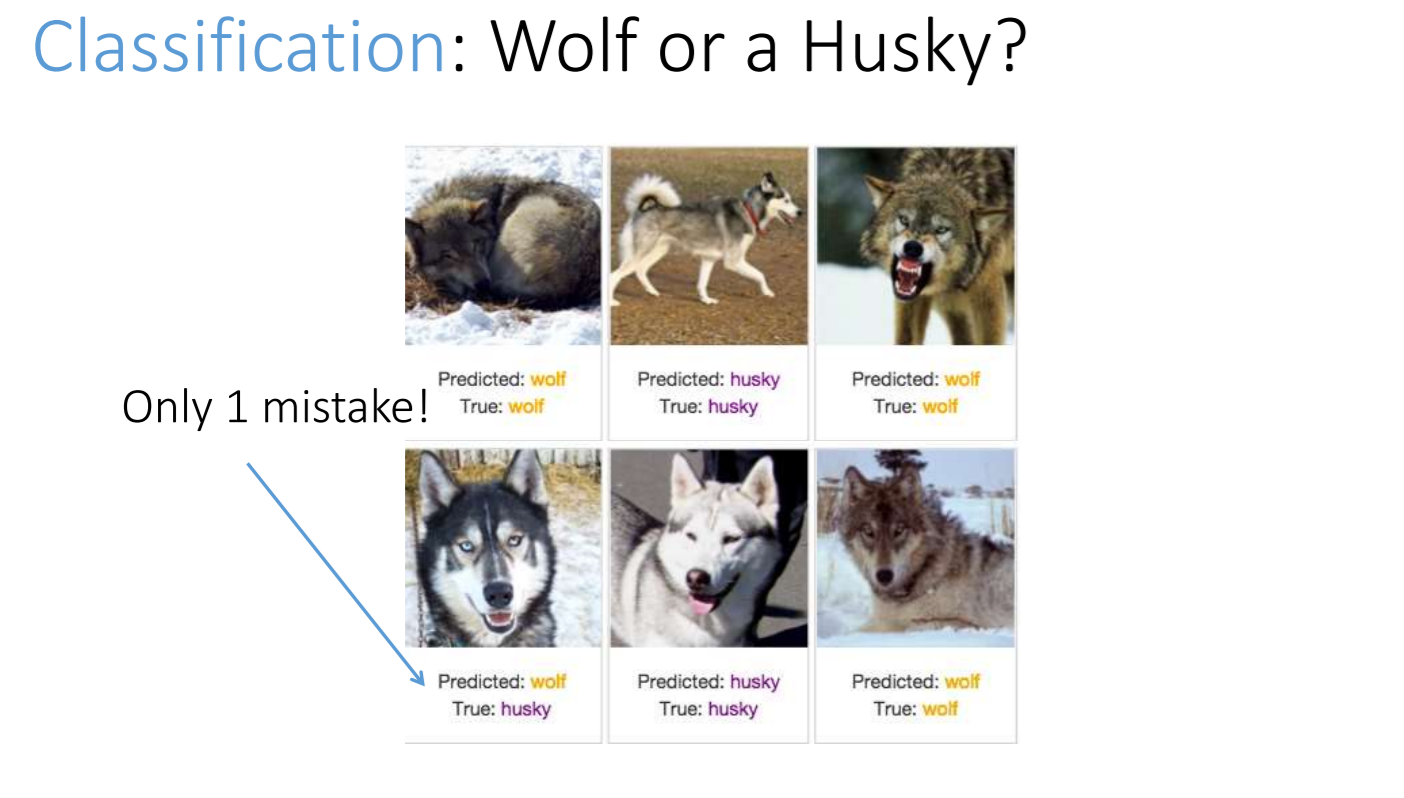

In [95]:
Image('wf.png',width=1000, height=1000)

실제 모델의 허스키 분류 기준

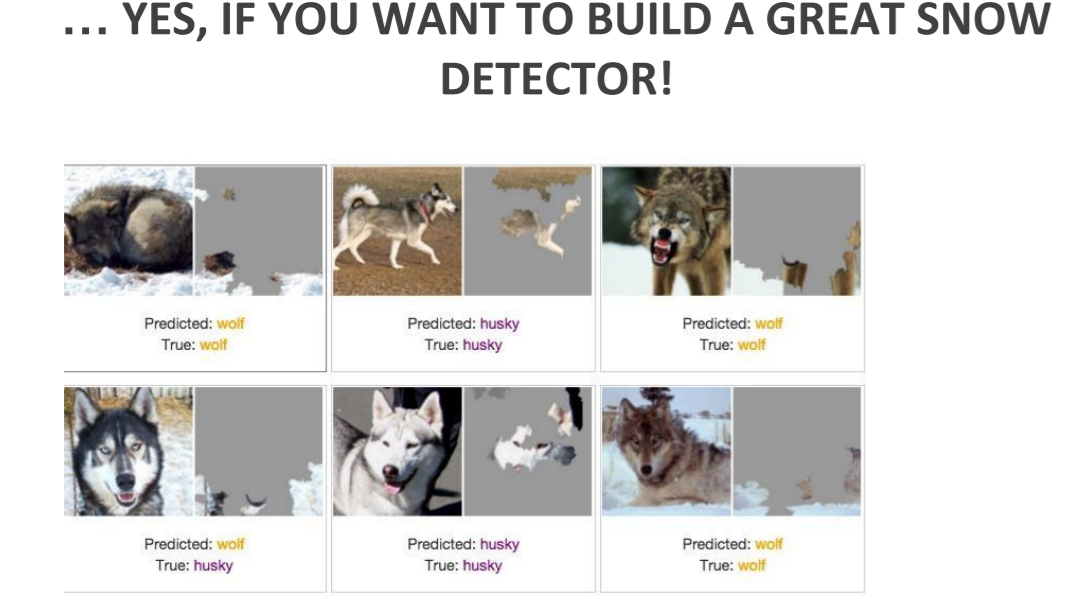

In [97]:
Image('wff.png',width=800, height=800)

###  기본적인 아이디어 소개영상 (LIME)
https://www.youtube.com/watch?v=hUnRCxnydCc

#### 단순한 결정 경계

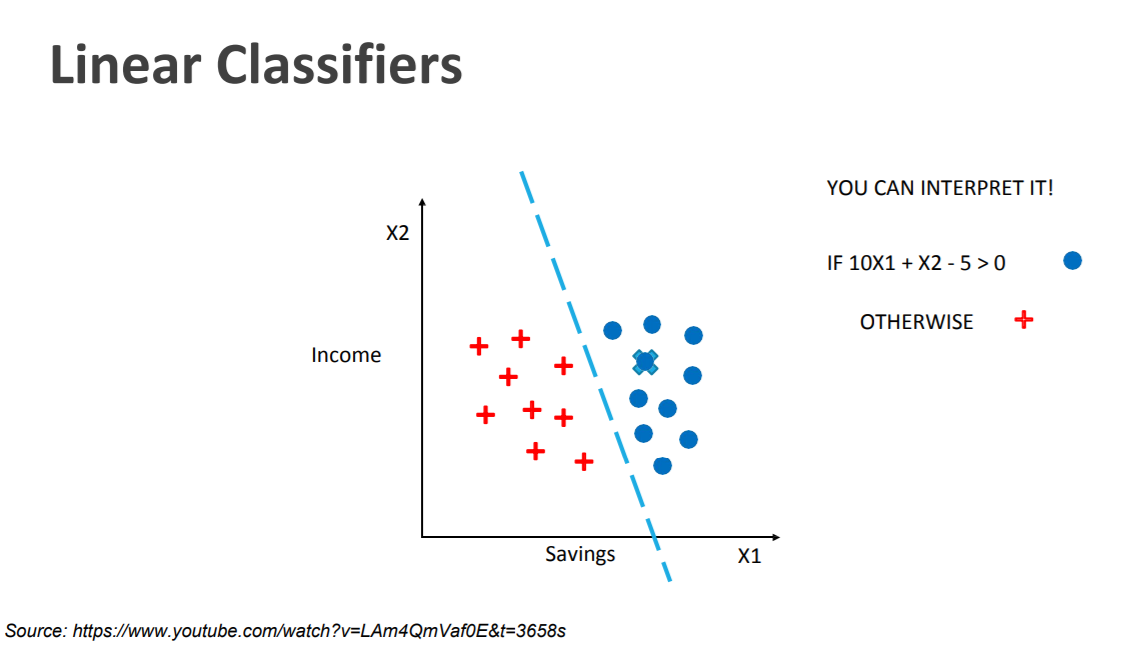

In [87]:
Image('linear.png',width=1000, height=1000)

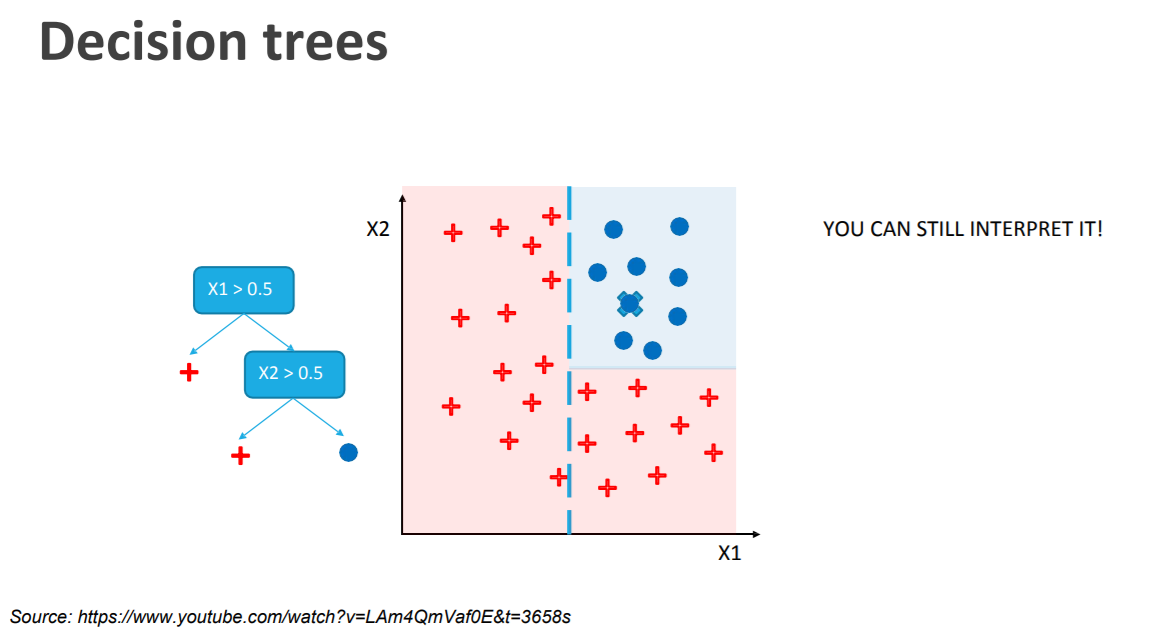

In [89]:
Image('dt.png',width=1000, height=1000)

#### 복잡한 결정 경계

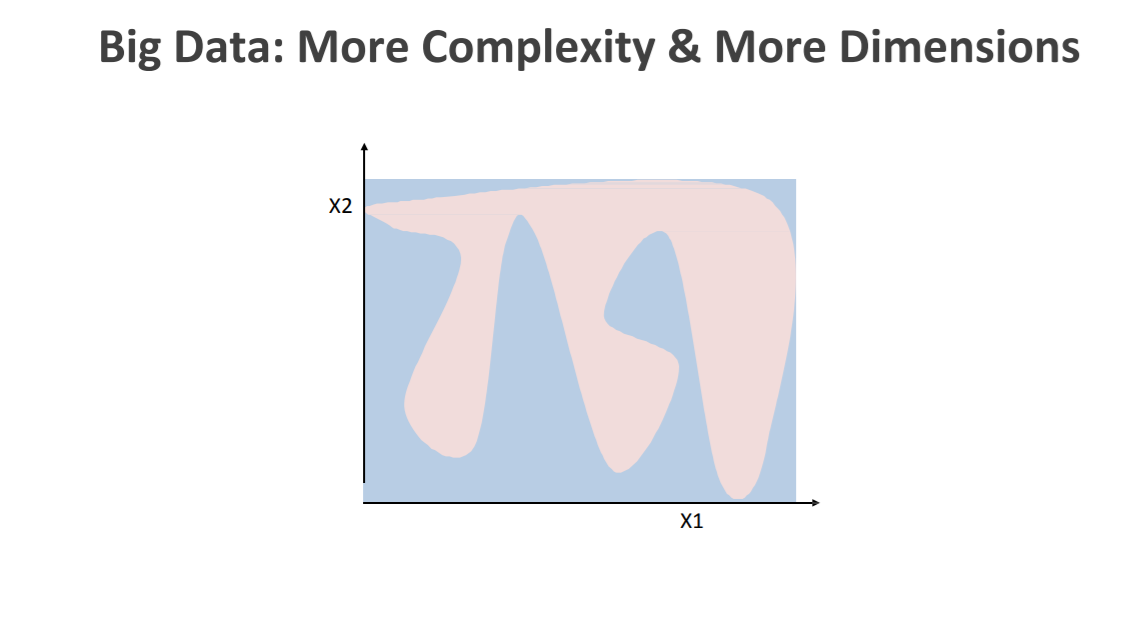

In [90]:
Image('bd.png',width=1000, height=1000)

#### 아이디어 소개

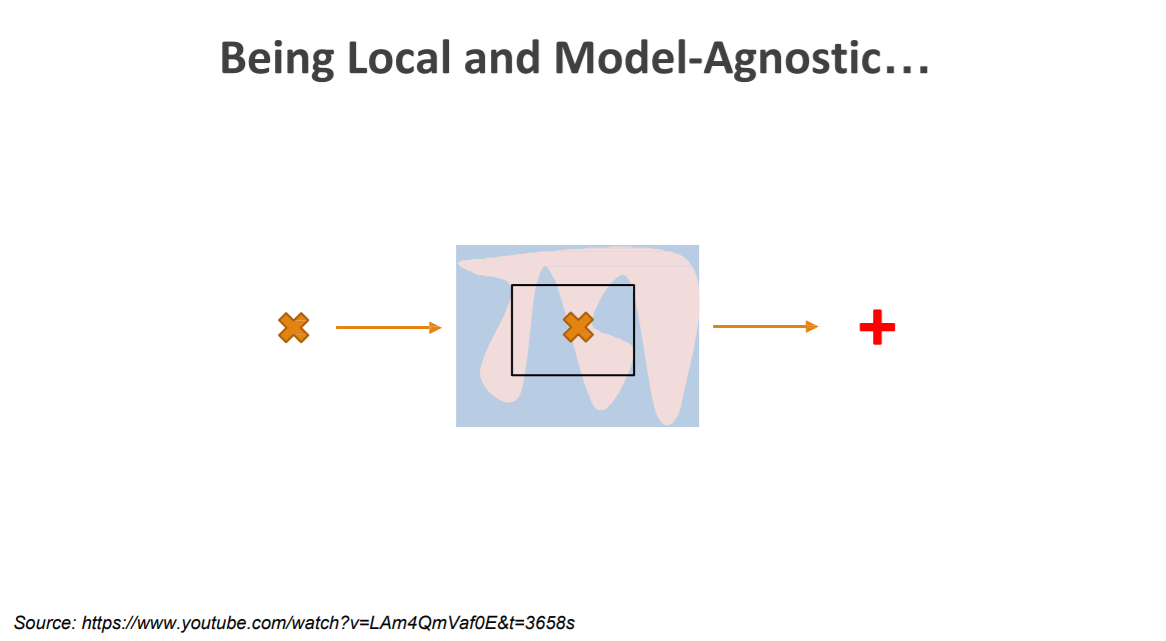

In [91]:
Image('3.png',width=1000, height=1000)

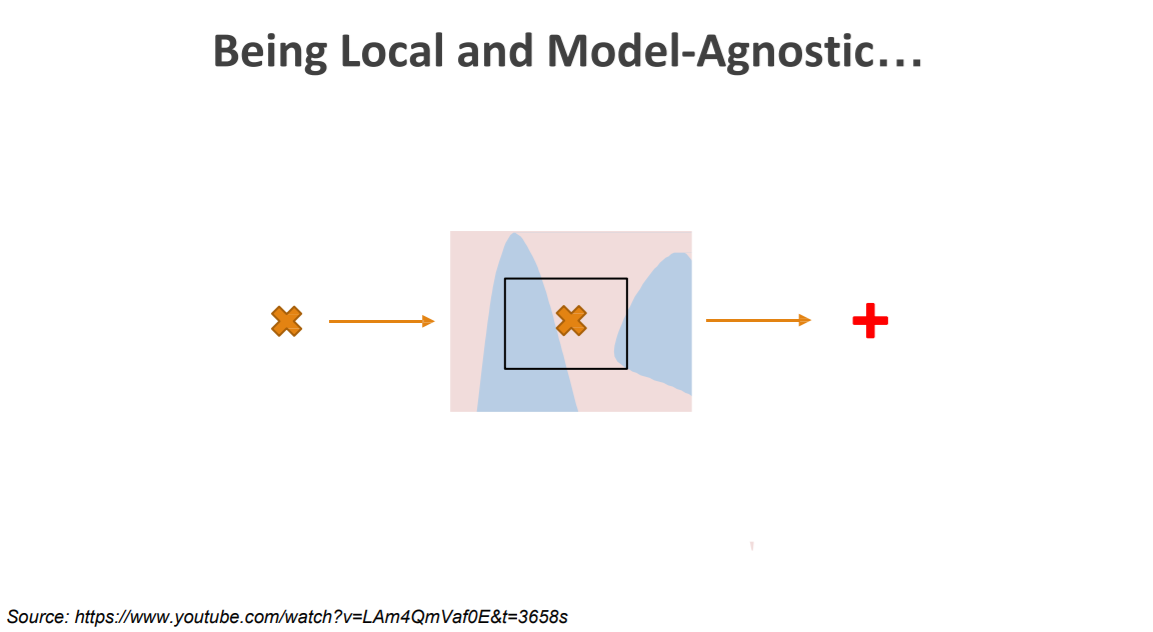

In [93]:
Image('4.png',width=1000, height=1000)

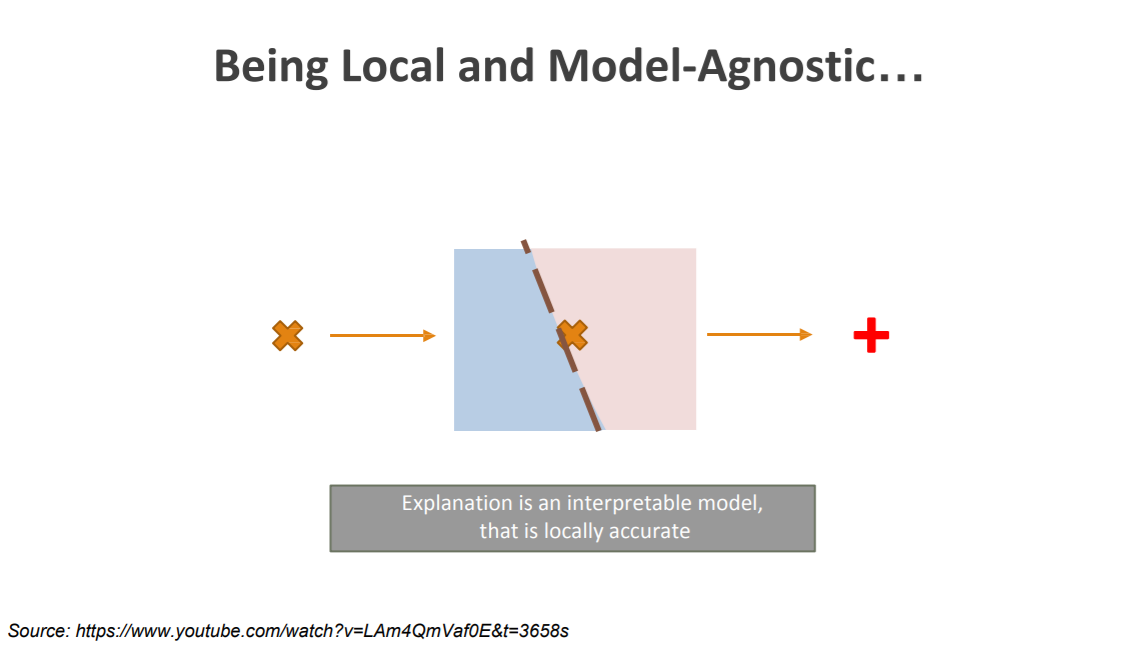

In [94]:
Image('5.png',width=1000, height=1000)

## 예제 데이터 설명

### 분류 문제 - Steel Plates Faults Data set

데이터 크기 : (1941, 28)

독립 변수 : 최대/최소 크기, 명도(Luminosity), 둘레 등 27가지 변수

타겟 변수 : 7 종류의 Steel Plates 결함 ('패스트리','Z_스크래치' ,'K_스크래치','얼룩','더러움','돌출','다른결함')  
(Pastry , Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults)

-> steel 제조 데이터를 활용하여 결함 분류

출처 : UCI machine learning

### 회귀 문제 - Oil Share price prediction

데이터 크기 : (373, 6)

독립 변수 : oil price, PMO.L(Premier Oil PLC), CNE.L(Cairn Energy PLC) , TOTAL(FP.PA), ENGIE (ENGI.PA)

타겟 변수 : share price 

-> 273일간의 가격 변동 데이터를 활용하여 이후 100일 동안의 share price 예측

출처 : Kaggle


### 텍스트 분류 - GIH 일일정보 데이터

데이터 크기 : (5933, 3)

독립 변수 : 일일 정보 텍스트

타겟 변수 : 2 종류의 카테고리 (철강, 경영)

--> 일일 정보 텍스트를 활용하여 카테고리 분류

출처 : GIH

##  LIME

### 분류 - Steel Plates 결함 데이터

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime,shap

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error 
from sklearn.pipeline import make_pipeline

from lime import lime_text
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline

In [302]:
col_names=list(pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults27x7_var',header=None)[0])
faults=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA',sep='\t',header=None)

features=faults.values
labels = features[:,27:34]
features = features[:,0:27]
labels = [np.argmax(row) for row in labels]
label_names=col_names[-6:]

f=faults
f.columns=col_names

In [3]:
# 데이터 요약
f.iloc[:,:27].head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity       ...        Outside_X_Index  Edges_X_Index  \
0                    108       ...                 0.0047         0.4706   
1                    123       ...                 0.0036         0.6000   
2                    125       ...                 0.0037         0.7500   
3                    126       ...                 0.0052         0.5385   
4                    126       ...                 0.0126         0.2833   

   Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0         1.0000                   1.0      2.4265       0.9031       1.6435   
1         0.9667                   1.0      2.0334       0.7782       1.4624   
2         0.9474                   1.0      1.8513       0.7782       1.2553   
3         1.0000                   1.0      2.2455       0.8451       1.6532   
4         0.9885                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0             0.8182           -0.2913          0.5822  
1             0.7931           -0.1756          0.2984  
2             0.6667           -0.1228          0.2150  
3             0.8444           -0.1568          0.5212  
4             0.9338           -0.1992          1.0000  

[5 rows x 27 columns]

#### 학습 / 테스트 데이터 분리

In [303]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=0.3)


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

- 모델 학습을 위해 트레이닝, 테스트 데이터 셋으로 분리
- SVM 모델을 학습시키기 위해 변수들을 정규화함

#### 모델 학습 - SVM

In [304]:
svm=SVC(probability=True,C=1,random_state=42)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

- 트레이닝 데이터 셋으로 모델을 학습시킵니다.

#### 예측 결과

In [305]:
y_pred=svm.predict(X_test)
print('정확도 :{}'.format(accuracy_score(y_test,y_pred)))

정확도 :0.7650085763293311


In [306]:
#target_names=['Pastry','Z_Scratch' ,'K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
target_names=['패스트리','Z_스크래치' ,'K_스크래치','얼룩','더러움','돌출','다른결함']

explainer = LimeTabularExplainer(np.array(X_train), 
                               random_state=42,
                               feature_names=col_names[:-7], 
                               class_names=target_names, 
                               discretize_continuous=True)

#### LIME 시각화 결과 (각 instance 별)

실제 값: 돌출
예측 값: 돌출
예측 결과 : True
값의 의미 :학습된 데이터의 분포를 가정하고, TypeOfSteel_A400 <= -1.23 일때, 평균적으로 예측치를 약 0.0561 만큼 상승시킵니다.


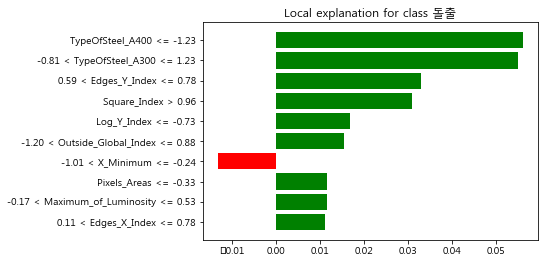

In [307]:
# 올바른 예측의 경우
idx=4
exp=explainer.explain_instance(np.array(X_test)[idx],svm.predict_proba, top_labels=1)
pred=svm.predict(X_test)
f=exp.as_pyplot_figure(label=pred[idx])
print('실제 값: {0}\n예측 값: {1}'.format(target_names[y_test[idx]],target_names[pred[idx]]))
print('예측 결과 :',(pred==y_test)[idx])

exp_info=exp.as_list(label=pred[idx])[0]
print('값의 의미 :학습된 데이터의 분포를 가정하고, {0} 일때, 평균적으로 예측치를 약 {1} 만큼 상승시킵니다.'
      .format(exp_info[0],np.round(exp_info[1],4)))

실제 값: 돌출
예측 값: Z_스크래치
예측 결과 : False


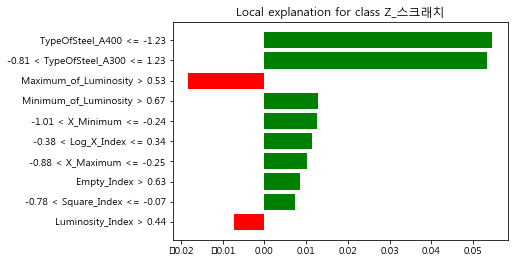

In [203]:
# 틀린 예측의 경우 
idx=5

exp=explainer.explain_instance(np.array(X_test)[idx],svm.predict_proba, top_labels=6)
pred=svm.predict(X_test)
f=exp.as_pyplot_figure(label=pred[idx])

print('실제 값: {0}\n예측 값: {1}'.format(target_names[y_test[idx]],target_names[pred[idx]]))
print('예측 결과 :',(pred==y_test)[idx])

In [124]:
# 올바른 예측의 경우 (idx=4)
exp.show_in_notebook(show_table=True, show_all=False)

### 회귀 - 석유 가격 예측

In [125]:
shell=pd.read_csv('C:/Users/POSRI/ref_data/oil/oil_price_dataset.csv',index_col=0)

In [127]:
shell.head()

index  share_price  oil_price  PMO.L       CNE.L      FP.PA    ENGI.PA
0   3997  1380.015015      36.28  48.75  160.399994  36.617168  13.988590
1   3998  1377.323120      35.56  47.50  154.699997  35.728664  13.805294
2   3999  1349.507446      33.89  47.00  146.800003  34.389011  13.456586
3   4000  1311.821655      33.57  48.50  141.500000  34.389011  13.461056
4   4001  1234.207153      31.67  46.00  137.800003  34.296947  13.519175

#### 학습 / 테스트 데이터 분리

In [205]:
# 과거 273일 데이터를 활용하여 100일 가격 변동 예측

X_train,y_train=shell[:-100].iloc[:,2:],shell[:-100].share_price
X_test,y_test=shell[-100:].iloc[:,2:],shell[-100:].share_price

#### 모델 학습 - SVM

In [206]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

svm=SVR(C=30)
svm.fit(X_train,y_train)

SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 예측 결과

MAE score :  125.70444626964803


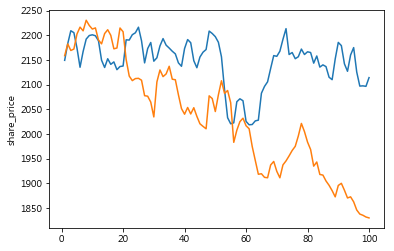

In [133]:
pred=svm.predict(X_test)

print('MAE score : ',mean_absolute_error(y_test,pred))

sns.lineplot(y=y_test,x=np.arange(1,101))
sns.lineplot(y=pred,x=np.arange(1,101))

#### LIME 시각화 결과

In [207]:
explainer = LimeTabularExplainer(np.array(X_train), feature_names=shell.columns, 
                                 class_names=['price'], 
                                 verbose=True, mode='regression')

idx=50
exp = explainer.explain_instance(np.array(X_test)[idx], svm.predict, num_features=5)

exp.show_in_notebook()

Intercept 1770.8146743672014
Prediction_local [1948.5774734]
Right: 2079.2122597348416


### 텍스트 사례 - GIH 일일정보 카테고리 분류

In [208]:
full_text=pd.read_csv('C:/Users/POSRI/ref_data/lime/gih_text.csv',index_col=0)

In [209]:
full_text.head().iloc[:,[0,-2]]

area                                               text
0   철강    \r\r\n              - 팀 인센티브, 수평적 조직, No-Lay...
1   경영  - 직원 아이디어 활용해 성공한 픽사, 고어, 라이트 솔루션즈 -     ○    ...
2   경영  - 필름 산업 사양길 접어들자 보유 기술 화장품에 적용해 화려하게 부활 -     ...
3   경영    - 제조기업의 혁신 Trend: Part I. 판매생산계획에서 자재조달까지 - ...
4   경영  - P&G, 학습옵션 활용해 신사업 진출 100% 성공…한화∙삼성도 적용 -    ...

In [210]:
full_text=full_text[full_text.area.isin(['철강','경영'])]
full_text.keyword=full_text.keyword.apply(lambda x: ' '.join(x.split(',')))
class_names=['경영','철강']

#### 학습 / 테스트 데이터 분리

In [211]:
X_train,X_test,y_train,y_test=train_test_split(full_text.iloc[:,1:],full_text.area,random_state=42)

#### 모델 학습 - RF

In [263]:
# TF-IDF로 텍스트 벡터화
vectorizer = TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(X_train.keyword)
test_vectors = vectorizer.transform(X_test.keyword)

# 모델 학습
rf = RandomForestClassifier(random_state=42)
rf.fit(train_vectors, y_train)
c = make_pipeline(vectorizer, rf)

explainer = LimeTextExplainer(class_names=['경영','철강'],random_state=42)

#### 예측 결과

In [264]:
y_pred=rf.predict(test_vectors)
print('정확도 :{}'.format(accuracy_score(y_test,y_pred)))

정확도 :0.9629380053908356


#### LIME 시각화 결과

예측 값 :철강
실제 값: 철강


C:\ProgramData\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


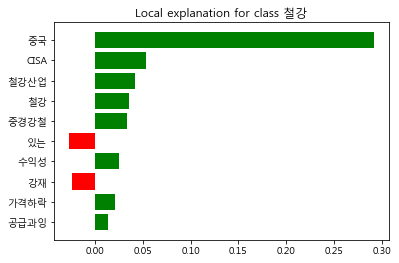

In [297]:
idx=1

pred=c.predict(X_test.keyword)
print('예측 값 :{0}\n실제 값: {1}'.format(pred[idx],y_test.values[idx]))

exp=explainer.explain_instance(np.array(X_test.text)[idx],c.predict_proba,num_features=10, top_labels=6)
f=e.as_pyplot_figure()

In [292]:
exp.show_in_notebook(text=True,)

## SHAP

### 분류 (binary) - RF

In [141]:
shap.initjs()

In [298]:
# subset
labels=pd.Series(labels)[pd.Series(labels).isin([2,5])]
features=pd.DataFrame(features).iloc[labels.index,:]
target_names=['K_스크래치','돌출']

# 학습 / 테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=0.3)

# 스케일링
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [167]:
y_pred=rf.predict(X_test)
print('정확도 :{}'.format(accuracy_score(y_test,y_pred)))

정확도 :0.9705882352941176


#### SHAP 시각화 결과

In [170]:
explainer=shap.KernelExplainer(rf.predict_proba,X_test)
shap_values=explainer.shap_values(X_test)

Using 238 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|████████████████████████████████████████| 238/238 [17:13<00:00,  4.34s/it]


In [63]:
# test 데이터
idx=23
target_class=1

shap.force_plot(explainer.expected_value[target_class], shap_values[target_class][idx,:],
                feature_names=col_names[:-7])

In [65]:
# test 데이터
idx=35

shap.force_plot(explainer.expected_value[target_class],
                shap_values[target_class][idx,:],
                feature_names=col_names[:-7])

In [67]:
# 모든 instance 들에 대한 SHAP values 플롯 (K_스크래치)
target_class=0
shap.force_plot(explainer.expected_value[target_class], shap_values[target_class], col_names[:-7])

### 회귀 - GBT

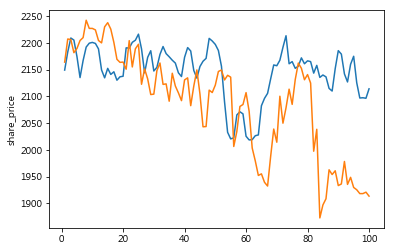

In [146]:
xgb=GradientBoostingRegressor(learning_rate=0.06,n_estimators=500)

xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

plt.figure('')
sns.lineplot(y=y_test,x=np.arange(1,101))
sns.lineplot(y=pred,x=np.arange(1,101))

In [143]:
# explain the model's predictions using SHAP values
# same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

#### SHAP 시각화 결과

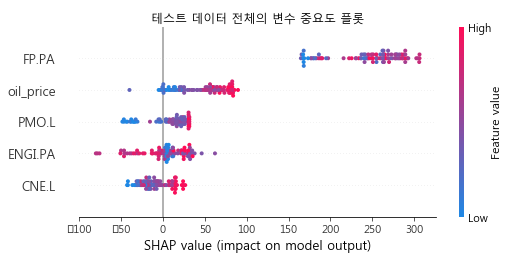

In [153]:
# summarize the effects of all the features

plt.title('테스트 데이터 전체의 변수 중요도 플롯')
shap.summary_plot(shap_values, X_test,feature_names=shell.columns[2:])

In [776]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Appendix

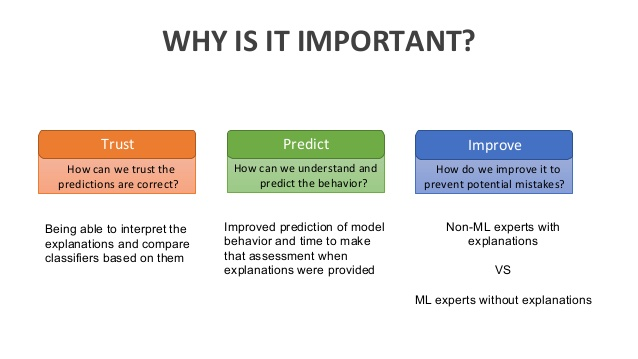

In [154]:
Image('interpretable-machine-learning-using-lime-framework-kasia-kulma-phd-data-scientist-aviva-36-638.jpg',width=1000, height=1000)

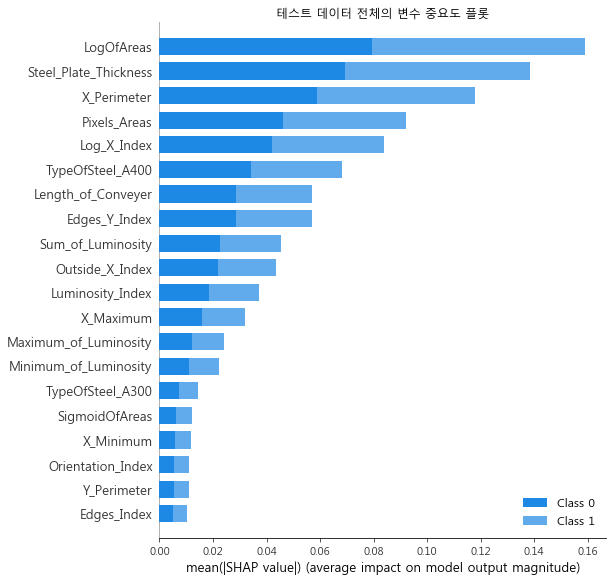

In [58]:
plt.title('테스트 데이터 전체의 변수 중요도 플롯')
shap.summary_plot(shap_values, X_test,feature_names=col_names[:27], plot_type="bar")

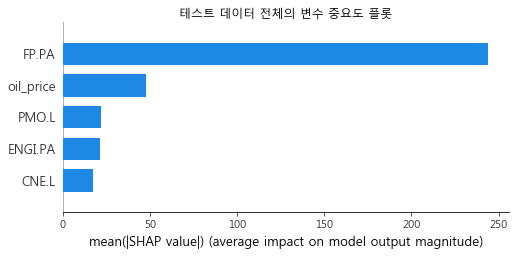

In [792]:
plt.title('테스트 데이터 전체의 변수 중요도 플롯')
shap.summary_plot(shap_values, X_test, plot_type="bar",)

### LIME 

특징 
1. 데이터를 permute 함
2. 원래 관측치와 permute 된 데이터 간의 거리를 계산함 (유사도)
3. 원래의 모델을 가지고 새로운 데이터를 예측함 
4. permute 데이터에서 원래의 모델 결과를 가장 잘 설명하는 m개의 변수를 선택함 
5. simple 모델을 permute 데이터에 피팅함 (변수 m개, 유사도 : weight)
6. simple 모델에서 추출한 weight들을 가지고 local 부분에서 복잡한 모델을 설명함

### SHAP (SHapley Additive exPlanations)

특징
- SHAP value : 각 feature가 모델의 예측 결과의 미치는 영향
- 모든 feature 들의 SHAP value의 합은 모델 예측 결과와 같음
계산 과정
- feature마다 각각의 SHAP value 가 존재
- 한 feature와, 나머지 feature를 가지고 두 모델을 학습시키고, 결과를 비교함
- 예측치를 새로운 input이 들어왔을때 비교하고, 모든 새로운 input에 대해 그 차이를 가중 평균함